## 다항회귀(Polynomial Regression) 이해

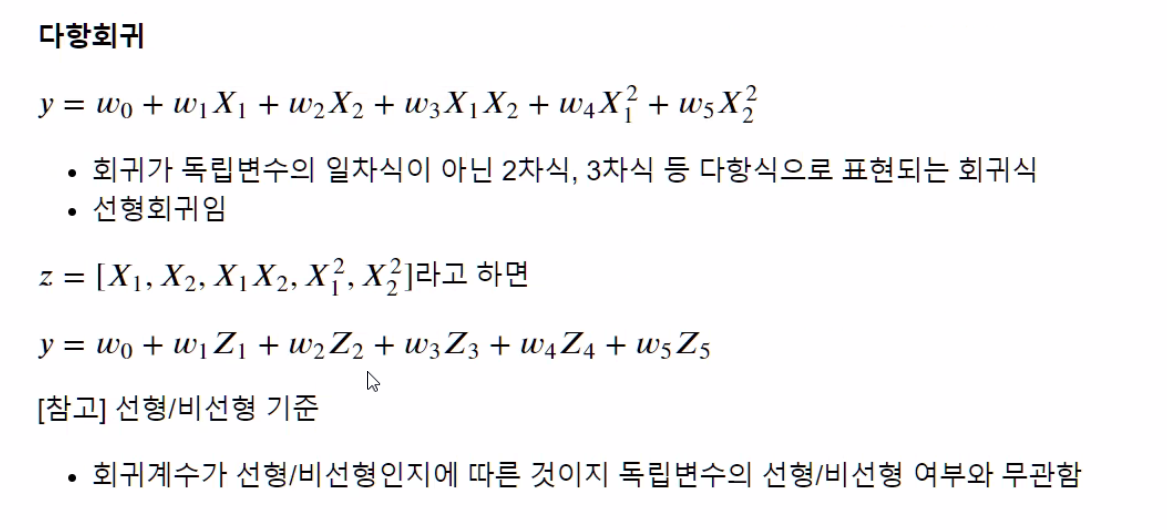

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(degree=2)

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [6]:
X2 = np.arange(9).reshape(3,3)
X2

poly.fit_transform(X2)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [7]:
def polynomial_func(X):
    y = 1 +2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)

y= polynomial_func(X)
print('삼차 다항식 결정값 : \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값 : 
 [  5 125]


#### 사이킷런 파이프라인을 이용하여 3차 다항회귀 학습

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 가상데이터 생성 및 다항 회귀 추정

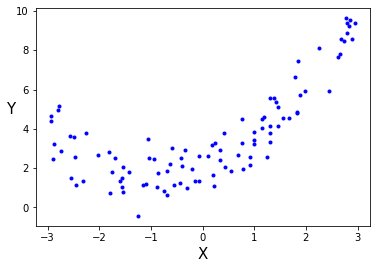

In [11]:
import matplotlib.pyplot as plt

m =100
X = 6 * np.random.rand(m,1) -3
y= 0.5 * X**2 + X+2+np.random.randn(m,1)

plt.plot(X,y,'b.')
plt.ylabel('Y',fontsize=15, rotation=0)
plt.xlabel('X',fontsize=15)
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04084918]), array([[0.97283938, 0.52966542]]))

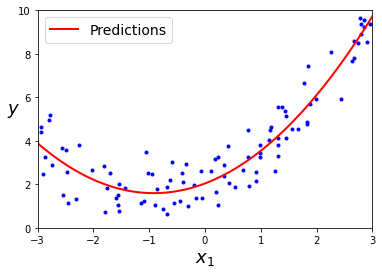

In [14]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()